In [672]:
# Mengimport Libraries
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
#import data dan membaca file csv
df = pd.read_csv('StudentPerformanceFactors.csv')
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [673]:
# Menampilkan ringkasan informasi dataframenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

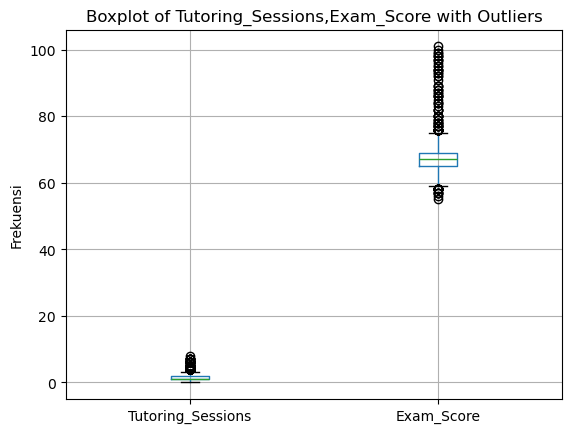

In [674]:
# Membuat boxplot untuk kolom Tutoring_Sessions, Exam_Score.
df.boxplot(column=['Tutoring_Sessions','Exam_Score' ])
plt.title('Boxplot of Tutoring_Sessions,Exam_Score with Outliers')
plt.ylabel('Frekuensi')
plt.show()

Tutoring Sessions

In [675]:
# Fungsi untuk menghitung batas dan menemukan outlier
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Hitung batas untuk 'Tutoring_Sessions'
lower_bound_tutoring, upper_bound_tutoring = find_outliers(df, 'Tutoring_Sessions')

# Hitung batas untuk 'Exam_Score'
lower_bound_exam, upper_bound_exam = find_outliers(df, 'Exam_Score')

# Temukan outlier dalam DataFrame
outliers_tutoring = df[(df['Tutoring_Sessions'] < lower_bound_tutoring) | (df['Tutoring_Sessions'] > upper_bound_tutoring)]
outliers_exam = df[(df['Exam_Score'] < lower_bound_exam) | (df['Exam_Score'] > upper_bound_exam)]

print("Outlier Tutoring_Sessions: ")
print(outliers_tutoring)
print("\nOutlier Exam_Score: ")
print(outliers_exam)

Outlier Tutoring_Sessions: 
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
10               17          80                  Low                High   
76               21          77                  Low              Medium   
82               29          78                 High                High   
124              24          73               Medium                High   
129              17          94                  Low              Medium   
...             ...         ...                  ...                 ...   
6552             22          65                  Low              Medium   
6553             16          74                  Low                High   
6559             28          72                  Low              Medium   
6579              9          84               Medium              Medium   
6594              9          90                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scor

In [676]:
# Membersihkan DataFrame dari outlier
df_cleaned = df[~((df['Tutoring_Sessions'] < lower_bound_tutoring) | 
                   (df['Tutoring_Sessions'] > upper_bound_tutoring) | 
                   (df['Exam_Score'] < lower_bound_exam) | 
                   (df['Exam_Score'] > upper_bound_exam))]

# Tampilkan DataFrame yang telah dibersihkan
print("\nDataFrame setelah membersihkan outlier: ")
print(df_cleaned)


DataFrame setelah membersihkan outlier: 
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours 

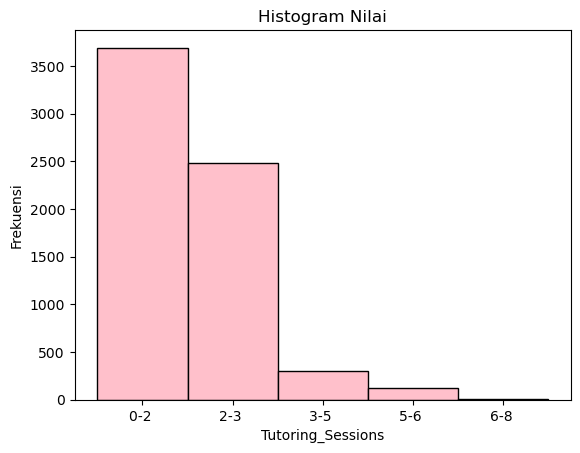

In [677]:
data_Tutoring_Sessions = df["Tutoring_Sessions"]
# Buat histogram
n, bins, patches = plt.hist(data_Tutoring_Sessions, bins=5, color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Tutoring_Sessions')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

<Axes: >

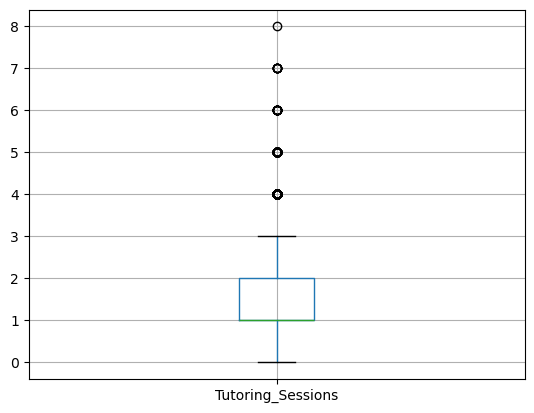

In [678]:
df.boxplot(column=['Tutoring_Sessions'])

In [679]:

# Menghapus duplikasi berdasarkan kolom Tutoring Sessions saja
df_cleaned = df.drop_duplicates(subset=['Tutoring_Sessions'])

# Menampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat berdasarkan 'Tutoring_Sessions':", len(df_cleaned))

Jumlah data setelah penghapusan duplikat berdasarkan 'Tutoring_Sessions': 9


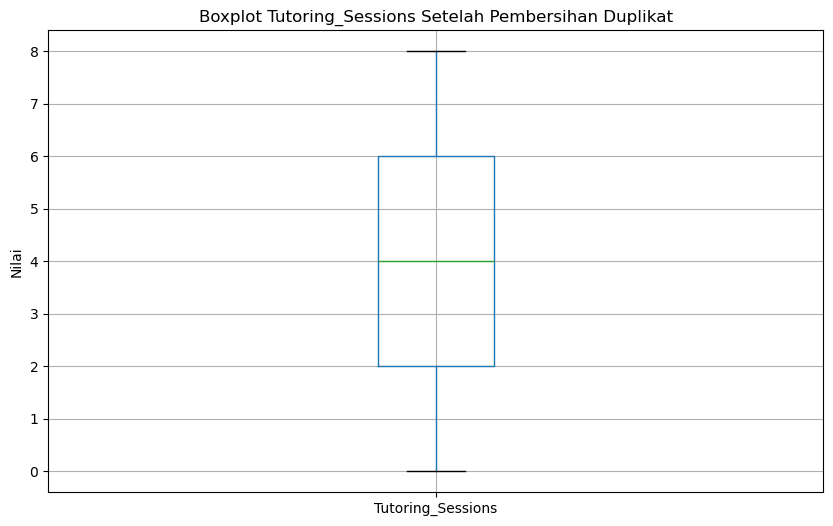

In [680]:
# Membuat boxplot dari data yang sudah dibersihkan
plt.figure(figsize=(10, 6))
df_cleaned[['Tutoring_Sessions']].boxplot()
plt.title('Boxplot Tutoring_Sessions Setelah Pembersihan Duplikat')
plt.ylabel('Nilai')
plt.show()

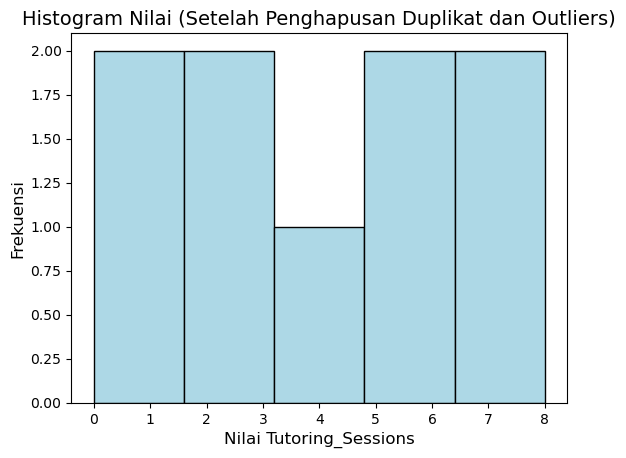

In [681]:
# Mengambil kolom Tutoring_Sessions dari data yang sudah dibersihkan dari duplikat
data_Tutoring_Sessions_cleaned = df_cleaned['Tutoring_Sessions']
# Membuat histogram setelah membersihkan duplikat dan outliers
n, bins, patches = plt.hist(data_Tutoring_Sessions_cleaned, bins=5, color='lightblue', edgecolor='black')

# Menambahkan label
plt.title('Histogram Nilai (Setelah Penghapusan Duplikat dan Outliers)', fontsize=14)
plt.xlabel('Nilai Tutoring_Sessions', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menampilkan histogram
plt.show()

Exam Score

Text(0.5, 1.0, 'Histogram Exam_Score')

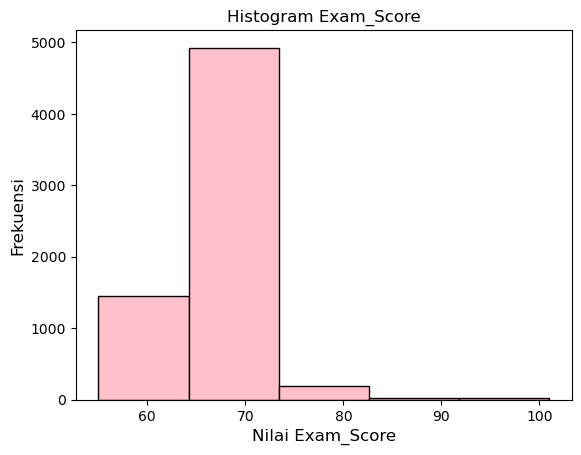

In [683]:
data_Exam_Score = df['Exam_Score']
# Buat Histogram
n, bins, patches = plt.hist(data_Exam_Score, bins=5, color='pink', edgecolor='black')

# Menambahkan judul dan label
plt.title('Histogram Nilai Exam_Score', fontsize=14)
plt.xlabel('Nilai Exam_Score', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
# Tambahkan label
plt.title('Histogram Exam_Score')

<Axes: >

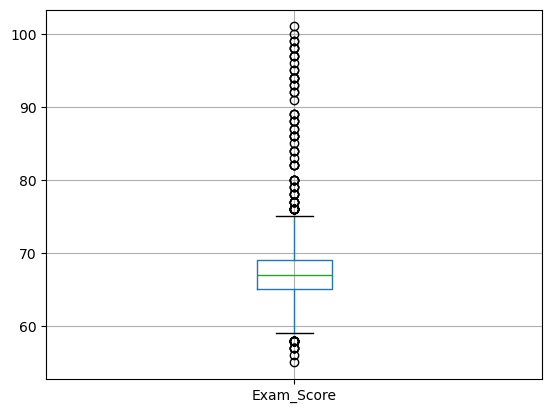

In [684]:
df.boxplot(column=['Exam_Score'])

In [685]:
# Menghapus duplikasi berdasarkan kolom 'Exam Score'saja
df_cleaned = df.drop_duplicates(subset=['Exam_Score'])

# Menampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat berdasarkan 'Exam_Score':", len(df_cleaned))

Jumlah data setelah penghapusan duplikat berdasarkan 'Exam_Score': 45


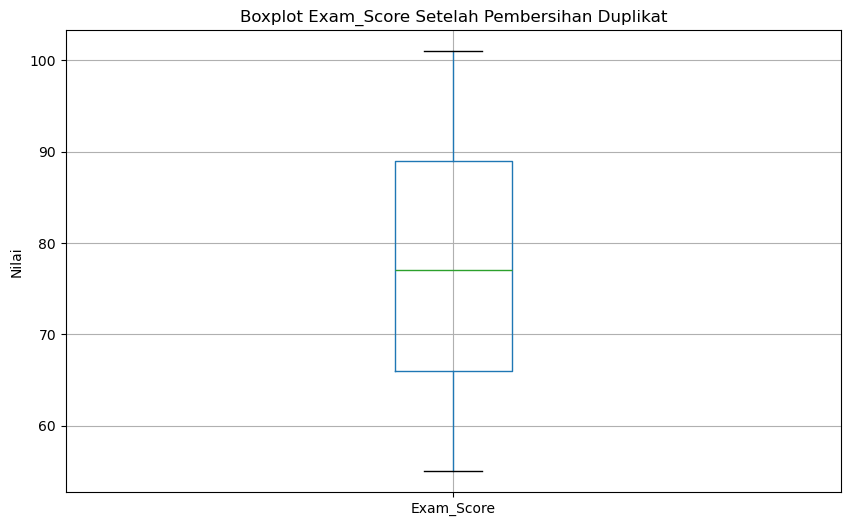

In [686]:
# Membuat boxplot dari data yang sudah dibersihkan
plt.figure(figsize=(10, 6))
df_cleaned[['Exam_Score']].boxplot()
plt.title('Boxplot Exam_Score Setelah Pembersihan Duplikat')
plt.ylabel('Nilai')
plt.show()

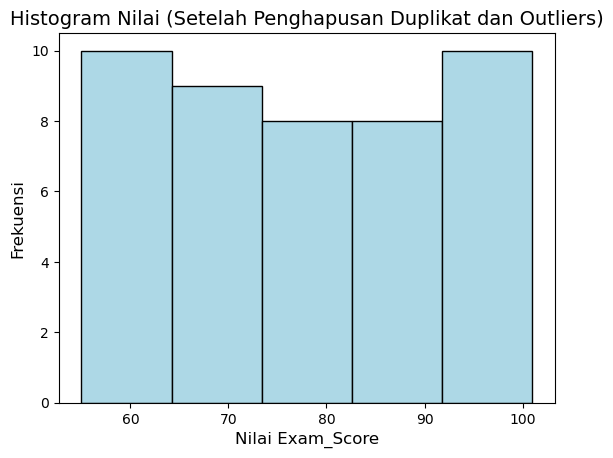

In [687]:
# Mengambil kolom Exam_Score dari data yang sudah dibersihkan dari duplikat
data_Exam_Score_cleaned = df_cleaned['Exam_Score']
# Membuat histogram setelah membersihkan duplikat dan outliers
n, bins, patches = plt.hist(data_Exam_Score_cleaned, bins=5, color='lightblue', edgecolor='black')

# Menambahkan label
plt.title('Histogram Nilai (Setelah Penghapusan Duplikat dan Outliers)', fontsize=14)
plt.xlabel('Nilai Exam_Score', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menampilkan histogram
plt.show()


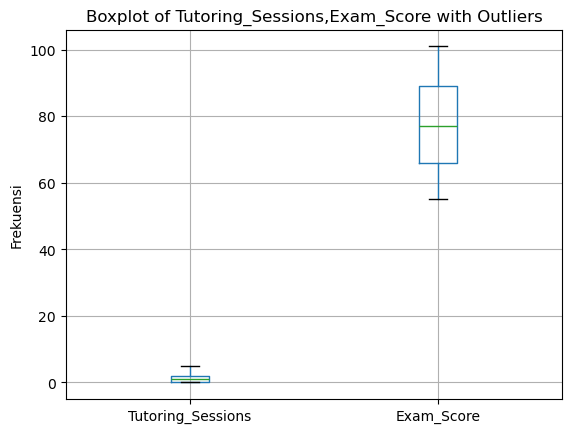

In [690]:
df_cleaned.boxplot(column=[ 'Tutoring_Sessions','Exam_Score' ])
plt.title('Boxplot of Tutoring_Sessions,Exam_Score with Outliers')
plt.ylabel('Frekuensi')
plt.show()

In [689]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64